# Introduction to machine learning
## \[5XSL0\] Fundamentals of Machine Learning - Assignment 1

In [13]:
# this cell imports the libraries or packages that you can use during this assignment
# you are not allowed to import additional libraries or packages
from helpers import *
import matplotlib.pyplot as plt
import numpy as np

> **Important**
>
> Do not import any other packages or libraries than the ones already provided to you.
>
> Write your code between the `BEGIN_TODO` and `END_TODO` markers. Do not change these markers.
>
> Always give derivations in [markdown cells](https://www.earthdatascience.org/courses/intro-to-earth-data-science/open-reproducible-science/jupyter-python/code-markdown-cells-in-jupyter-notebook/).
>
> Restart your notebook and run all cells before submission.

## Introduction
In this assignment you will learn about the basic tools that are used in the field of machine learning.
The exercises will teach you the mathematical concepts involved in so-called neural networks, by applying them on small scale examples.
During the exercises you will also learn how design choices will affect the corresponding optimization procedures and how you can properly assess a model's performance.

This assignment is split into 3 parts. Part 1 will brush up the mathematical concepts required for solving machine learning problems by solving a linear system of equations. Part 2 will continue with this problem and will apply the learned methodology to a simple linear regression problem. In part 3 we will make the linear regression model more complex by extending the model to be used for linear classification problems. Although this is a group assignment, you are ought to get familiar with all parts of the assignment. Getting a thorough understanding of the material in this assignment will significantly aid your machine learning expertise.

### Learning goals
After this assignment you can
- use gradient descent for solving convex optimization problems;
- solve a linear system of equations directly;
- solve a linear system of equations using (stochastic) gradient descent;
- explain why (stochastic) gradient descent algorithms are favorable when using larger models;
- quantify the performance of a model and explain the influence of the learning rate on the training procedure;
- use (stochastic) gradient descent to solve linear regression problems;
- use (stochastic) gradient descent to solve linear classification problems.

## Part 1: Optimization and linear systems of equations
In this part we will brush up some mathematical concepts that we will use in the rest of the assignment. We first discuss partial derivatives, gradients, Jacobians and (stochastic) gradient descent and later apply this to a linear system of equations.

The goal of optimization is to maximize or minimize a certain function. If we consider the minization problem, we are interested in finding the global minimum $x^\star$ of a function $f(x)$, such that 
$$f(x) \geq f(x^\star) \quad \forall \quad x $$
holds. In other words, the value of $f(x^\star)$ at the global minimum $x^\star$ is the lowest value that $f(x)$ can attain for all values of $x$. When there is only one point that attains this minimum, this inequality is strict: $f(x) > f(x^\star)$.

One way of finding the global minimum is by first determining the stationary points of the function: the points where the derivative of that function equals zero, i.e. $\frac{\partial f(x)}{\partial x} = 0$. In these points the tangent line is horizontal and therefore indicates that we are in a local minimum, a local maximum or in a saddle point. Evaluating the second derivate of the function in these points gives us a measure of the curvature of the function and allows us to determine with which type of stationary point we are dealing with.


---
---
### Exercise 1.1: Minimizing functions (1 point) 
Consider the function 
$$ f(x) = \frac{1}{4}x^4 - 4x^2 + 2. $$
Plot this function for $-5\leq x \leq 5$ and algebraically determine its stationary points. Write down your derivations in a markdown cell below.

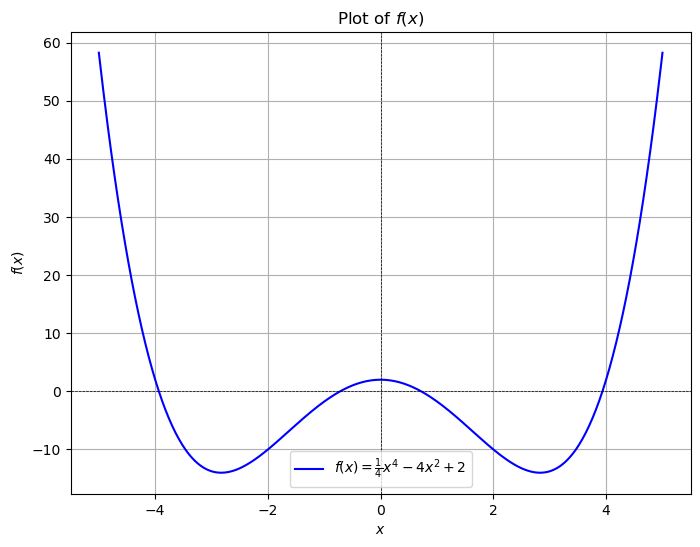

In [14]:
#// BEGIN_TODO [5XSL0_Assignment1_1_1a] Plot univariate function

# Define the function
def f(x):
    return (1/4) * x**4 - 4 * x**2 + 2

# Generate x values and compute f(x)
x = np.linspace(-5, 5, 500)
y = f(x)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r"$f(x) = \frac{1}{4}x^4 - 4x^2 + 2$", color="blue")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.title("Plot of $f(x)$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid(True)
plt.legend()
plt.show()

#// END_TODO [5XSL0_Assignment1_1_1a]

`#// BEGIN_TODO [5XSL0_Assignment1_1_1b] Markdown cell with derivations`

# Derivations of Stationary Points

## 1. Find the derivative of $f(x)$

The given function is:  
$$
f(x) = \frac{1}{4}x^4 - 4x^2 + 2
$$

The first derivative is:  
$$
f'(x) = \frac{d}{dx} \left( \frac{1}{4}x^4 - 4x^2 + 2 \right) = x^3 - 8x
$$

---

## 2. Find the stationary points by solving $f'(x) = 0$

Set $f'(x) = 0$:  
$$
x^3 - 8x = 0
$$

Factorize:  
$$
x(x^2 - 8) = 0
$$

This gives:  
$$
x = 0 \quad \text{or} \quad x^2 = 8 \quad \Rightarrow \quad x = \pm\sqrt{8} = \pm 2\sqrt{2}
$$

So, the stationary points are:  
$$
x = 0, \quad x = 2\sqrt{2}, \quad x = -2\sqrt{2}.
$$

---

## 3. Determine the nature of each stationary point

Use the second derivative test:  
$$
f''(x) = \frac{d}{dx}(x^3 - 8x) = 3x^2 - 8
$$

- **At $x = 0$:**  
$$
f''(0) = 3(0)^2 - 8 = -8 \quad (\text{Negative, so } x=0 \text{ is a local maximum}).
$$

- **At $x = \pm 2\sqrt{2}$:**  
$$
f''(\pm 2\sqrt{2}) = 3(2\sqrt{2})^2 - 8 = 3(8) - 8 = 24 - 8 = 16 \quad (\text{Positive, so these are local minima}).
$$

---

## 4. Summary of Stationary Points

- Local maximum at $x = 0$.  
- Local minima at $x = \pm 2\sqrt{2}$.


`#// END_TODO [5XSL0_Assignment1_1_1b] `

### End of exercise 1.1
---
---
In not all circumstances a function submits to a closed-form solution for its stationary points. In these cases we can resort to an iterative procedure for finding a local minimum. Suppose that we are dealing with a convex function, i.e. a function whose curvature is always positive and therefore its derivative is always increasing. If we start at some arbitrary point $x^{(1)}$ and we would like to move towards a local minimum of the function $f(x)$, we can evaluate the derivative in this point. If the value of the derivative in this point $\frac{\partial f(x)}{\partial x}\lvert_{x=x^{(1)}}$ is positive, then the function is increasing to the right of this point. In order to minimize $f(x)$ we could then take a small step to the left of $x^{(1)}$ to some $x^{(2)}$ and again evaluate the derivative to make another step. This procedure is known as gradient descent and can be represented as 
$$ x^{(i+1)} = x^{(i)} - \lambda \frac{\partial f(x)}{\partial x}\Bigg\lvert_{x=x^{(i))}}.$$
Note that the minus sign makes sure that we move to the left when the derivative is positive and vice versa. The hyperparameter $\lambda$ specifies our step size, which is also known as the learning rate. The notation $x^{(i)}$ refers to the point at which we start in the $i^\text{th}$ iteration of the algorithm.

---
---
### Exercise 1.2: Univariate gradient descent (3 points)
Consider the function
$$ h(x) = x^2 + e^{x}. $$
Calculate the partial derivative of $h(x)$ with respect to $x$ in a Markdown cell below and shortly elaborate on why there is no closed-form solution for determining the stationary point. Furthermore, define functions `function_h()`, `derivative_h()`, `gradient_descent()` and `optimize()`, which:
- `function_h(x)` - calculates the value of $h(x)$ for some `x`.
- `derivative_h(x)` - calculates the derivative of $h(x)$ at some value `x`.
- `gradient_descent(x, learning_rate)` - updates the value of `x` given learning rate hyperparameter.
- `optimize(x, learning_rate, nr_iterations)` - iteratively updates the value of `x` using gradient descent.

Finally, create 3 plots, one showing $h(x)$ for $-3\leq x\leq3$, one showing $h(x^{(i)})$ as a function of the number of iterations and one showing the value of $x^{(i)}$ as a function of the number of iterations.

Use the following initial values: $x=3$, $\lambda=0.001$ and 2000 iterations.


`#// BEGIN_TODO [5XSL0_Assignment1_1_2a] Derive partial derivative and motivate`

### **Mathematical Derivation**

The function is given by:

$$
h(x) = x^2 + e^x.
$$

To calculate the derivative of $h(x)$ with respect to $x$, we apply standard differentiation rules:

1. The derivative of $x^2$ with respect to $x$ is $2x$.
2. The derivative of $e^x$ with respect to $x$ is $e^x$.

Thus, the derivative is:

$$
\frac{d}{dx} h(x) = 2x + e^x.
$$

---

### **Why There is No Closed-Form Solution for Stationary Points**

To find the stationary points, we would typically set the derivative equal to zero:

$$
2x + e^x = 0.
$$

However, this equation cannot be solved algebraically in closed form because the term $e^x$ introduces a non-polynomial component. This results in a transcendental equation, which typically cannot be solved exactly using elementary functions. Therefore, we need to rely on numerical methods like gradient descent to find the solution.

`#// END_TODO [5XSL0_Assignment1_1_2a]`

In [15]:
#// BEGIN_TODO [5XSL0_Assignment1_1_2b] Create univariate gradient descent algorithm

# Function h(x)
def function_h(x):
    return x**2 + np.exp(x)

# Derivative of h(x)
def derivative_h(x):
    return 2 * x + np.exp(x)

# Gradient descent update step
def gradient_descent(x, learning_rate):
    grad = derivative_h(x)
    return x - learning_rate * grad

# Optimization function
def optimize(x, learning_rate, nr_iterations):
    x_values = [x]  # Store all x^(i) values
    y_values = [function_h(x)]  # Store all h(x^(i)) values

    for _ in range(nr_iterations):
        x = gradient_descent(x, learning_rate)
        x_values.append(x)
        y_values.append(function_h(x))
    
    return x_values, y_values

#// END_TODO [5XSL0_Assignment1_1_2b]

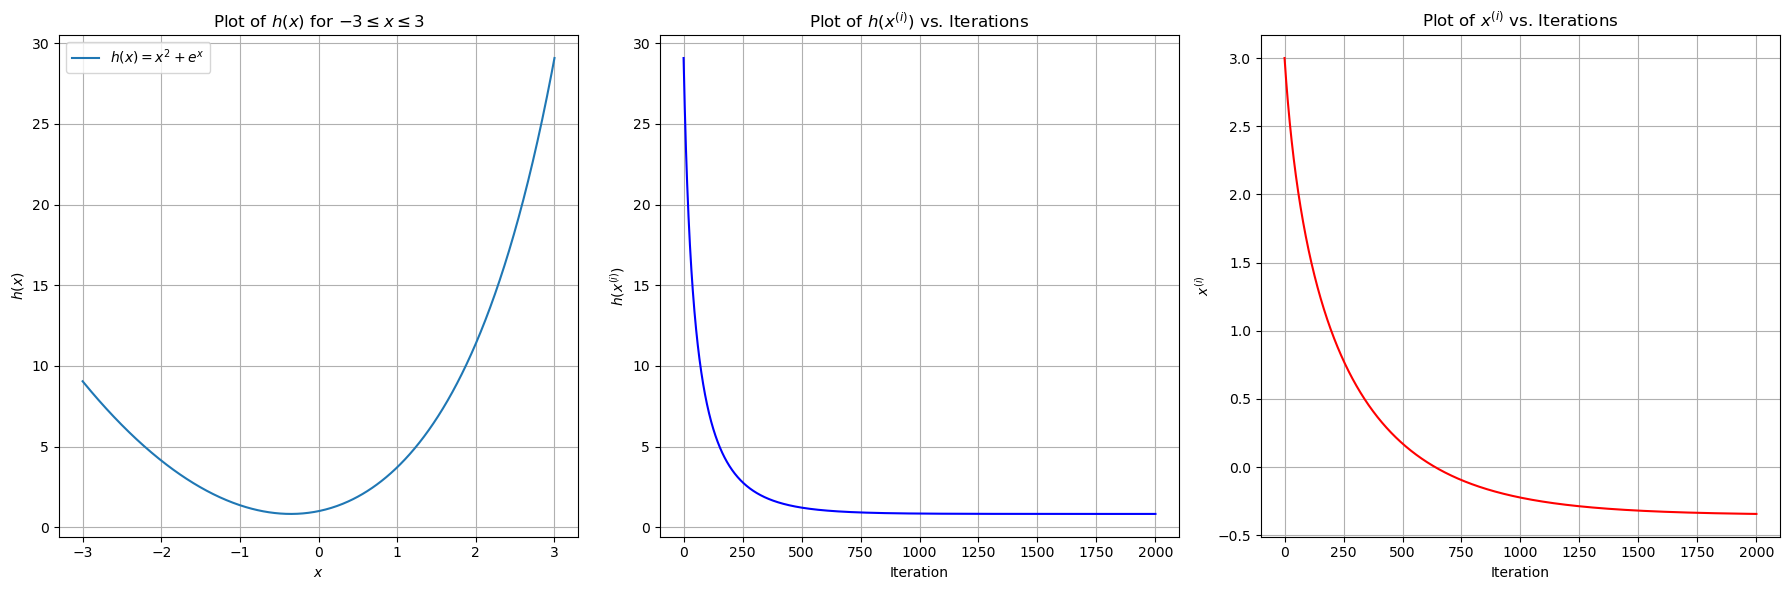

In [16]:
#// BEGIN_TODO [5XSL0_Assignment1_1_2c] Run algorithm and plot results

# Parameters
initial_x = 3
learning_rate = 0.001
nr_iterations = 2000

# Optimization
x_values, y_values = optimize(initial_x, learning_rate, nr_iterations)

# Create plots
x = np.linspace(-3, 3, 500)
h_values = function_h(x)

plt.figure(figsize=(18, 6))

# 1. Plot h(x) for -3 <= x <= 3
plt.subplot(1, 3, 1)
plt.plot(x, h_values, label=r"$h(x) = x^2 + e^x$")
plt.title(r"Plot of $h(x)$ for $-3 \leq x \leq 3$")
plt.xlabel("$x$")
plt.ylabel("$h(x)$")
plt.grid(True)
plt.legend()

# 2. Plot h(x^(i)) as a function of the number of iterations
plt.subplot(1, 3, 2)
plt.plot(range(nr_iterations + 1), y_values, color="blue")
plt.title(r"Plot of $h(x^{(i)})$ vs. Iterations")
plt.xlabel("Iteration")
plt.ylabel(r"$h(x^{(i)})$")
plt.grid(True)

# 3. Plot x^(i) as a function of the number of iterations
plt.subplot(1, 3, 3)
plt.plot(range(nr_iterations + 1), x_values, color="red")
plt.title(r"Plot of $x^{(i)}$ vs. Iterations")
plt.xlabel("Iteration")
plt.ylabel(r"$x^{(i)}$")
plt.grid(True)

plt.tight_layout()
plt.show()

#// END_TODO [5XSL0_Assignment1_1_2c]

### End of exercise 1.2

---
---

At this point we have seen that finding the local minimum of a function can be performed by iteratively optimizing the function. It should be noted that this does not give any guarantees that we are in a global minimum, unless the function is convex.

In the field of machine learning oftentimes functions (or models) are created with lots of variables. These variables allow for a flexible model for various tasks. For finding a local minimum in these functions, we should take into account all variables. Given some input $x$ and function $f(x, {\boldsymbol{\theta}})$, parameterized by the set of parameters $\boldsymbol{\theta} = [\theta_1, \theta_2, \ldots, \theta_M]^\top$, we are interested optimizing these parameters. For optimizing multiple parameters we can calculate the gradient
$$ \nabla_{\boldsymbol{\theta}} f(x, {\boldsymbol{\theta}}) = \begin{bmatrix} \frac{\partial f(x,{\boldsymbol{\theta}})}{\partial \theta_1} \\ \frac{\partial f(x,{\boldsymbol{\theta}})}{\partial \theta_2} \\ \vdots \\ \frac{\partial f(x, {\boldsymbol{\theta}})}{\partial \theta_M} \end{bmatrix}$$
which represents a vector whose direction specifies the direction of greatest ascent. Minimizing the parameters therefore results in going in the opposite direction using gradient descent as 
$$ {\boldsymbol{\theta}}^{(i+1)} = {\boldsymbol{\theta}}^{(i)} - \lambda \ \nabla_{\boldsymbol{\theta}} f(x,{\boldsymbol{\theta}}^{(i)}).$$
As all terms in this equation are vectors (except for the learning rate $\lambda$), all parameters will get updated simultaneously with the same step size.

---
---
### Exercise 1.3: Multivariate gradient descent (3 points)
Consider the 2-dimensional function
$$ h(x_1, x_2) = x_1^2 + x_2^2 - x_1x_2. $$
Calculate the gradient of $h(x_1, x_2)$ analytically with respect to $\boldsymbol{x} = [x_1, x_2]^\top$ in a Markdown cell below. Furthermore, define functions `function_h()`, `gradient_h()`, `gradient_descent()` and `optimize()`, which:
- `function_h(x)` - calculates the value of $h(x_1, x_2)$ for some vector `x`$=[x_1,x_2]^\top$.
- `gradient_h(x)` - calculates the gradient of $h(x)$ at some vector `x`.
- `gradient_descent(x, learning_rate)` - updates the value of vector `x` given learning rate hyperparameter.
- `optimize(x, learning_rate, nr_iterations)` - iteratively updates the values of vector `x` using gradient descent.

Finally, create 2 plots, one contour plot showing $h(x_1, x_2)$ for $-3\leq x_1\leq3$ and $-3\leq x_2\leq3$ with a line representing the trajectory of the different values of $x^{(i)}$ and its final value represented as a red dot, and one plot showing $h(x^{(i)})$ as a function of the number of iterations.

Use the following initial values: $x=[1.5, 2.5]$, $\lambda=0.001$ and 2500 iterations.

`#// BEGIN_TODO [5XSL0_Assignment1_1_3a] Derive gradient`

### **Gradient of $h(x_1, x_2)$**

Consider the function:

$$
h(x_1, x_2) = x_1^2 + x_2^2 - x_1 x_2.
$$

To calculate the gradient of $h(x_1, x_2)$, we take the partial derivatives of $h$ with respect to $x_1$ and $x_2$:

1. **Partial derivative with respect to $x_1$:**
   $$
   \frac{\partial h}{\partial x_1} = 2x_1 - x_2.
   $$

2. **Partial derivative with respect to $x_2$:**
   $$
   \frac{\partial h}{\partial x_2} = 2x_2 - x_1.
   $$

Thus, the gradient of $h(x_1, x_2)$ with respect to $\boldsymbol{x} = [x_1, x_2]^\top$ is:

$$
\nabla h(x_1, x_2) = \begin{bmatrix} \frac{\partial h}{\partial x_1} \\ \frac{\partial h}{\partial x_2} \end{bmatrix} = \begin{bmatrix} 2x_1 - x_2 \\ 2x_2 - x_1 \end{bmatrix}.
$$


`#// END_TODO [5XSL0_Assignment1_1_3a]`

In [17]:
#// BEGIN_TODO [5XSL0_Assignment1_1_3b] Create multivariate gradient descent algorithm

# 1. Define the function h(x)
def function_h(x):
    x1, x2 = x[0], x[1]
    return x1**2 + x2**2 - x1*x2

# 2. Define the gradient of h(x)
def gradient_h(x):
    x1, x2 = x[0], x[1]
    grad_x1 = 2*x1 - x2
    grad_x2 = 2*x2 - x1
    return np.array([grad_x1, grad_x2])

# 3. Perform one step of gradient descent
def gradient_descent(x, learning_rate):
    grad = gradient_h(x)
    return x - learning_rate * grad

# 4. Optimize using gradient descent for a number of iterations
def optimize(x, learning_rate, nr_iterations):
    x_values = [x]  # Keep track of the values of x
    y_values = [function_h(x)]  # Keep track of the values of h(x)

    for i in range(nr_iterations):
        x = gradient_descent(x, learning_rate)
        x_values.append(x)
        y_values.append(function_h(x))

    return np.array(x_values), np.array(y_values)

# Parameters
x_init = np.array([1.5, 2.5])  # Initial x value
learning_rate = 0.001  # Learning rate (lambda)
nr_iterations = 2500  # Number of iterations

# Optimize the function
x_values, y_values = optimize(x_init, learning_rate, nr_iterations)

#// END_TODO [5XSL0_Assignment1_1_3b]

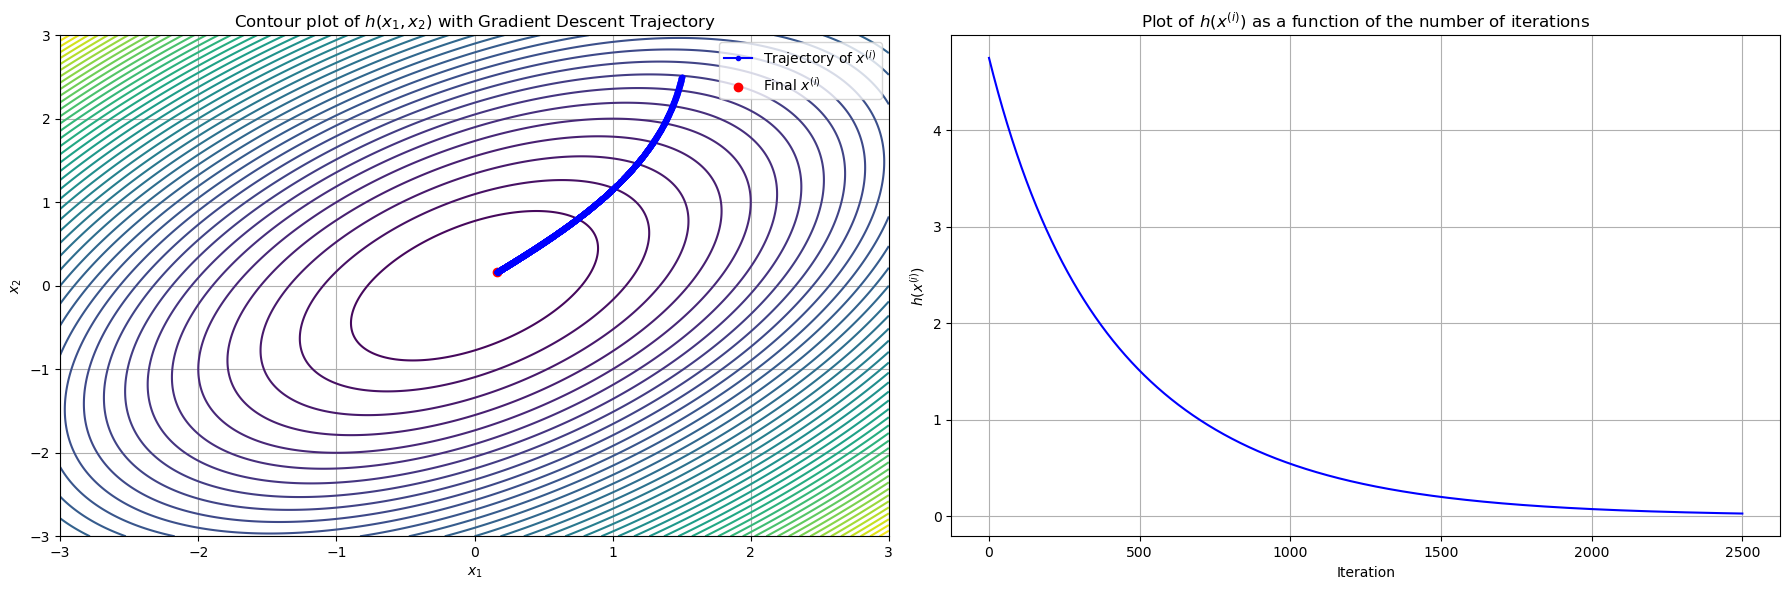

In [18]:
#// BEGIN_TODO [5XSL0_Assignment1_1_3c] Run algorithm and plot results

# Parameters
x_init = np.array([1.5, 2.5])  # Initial x value
learning_rate = 0.001  # Learning rate (lambda)
nr_iterations = 2500  # Number of iterations

# Optimize the function
x_values, y_values = optimize(x_init, learning_rate, nr_iterations)

# Create a grid of x1, x2 values for the contour plot
x1_range = np.linspace(-3, 3, 500)
x2_range = np.linspace(-3, 3, 500)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = X1**2 + X2**2 - X1*X2  # Calculate h(x1, x2) for the grid

# Create side-by-side plots
plt.figure(figsize=(18, 6))

# 1. Contour plot with gradient descent trajectory
plt.subplot(1, 2, 1)
plt.contour(X1, X2, Z, levels=50, cmap='viridis')
x_values_plot = np.array(x_values)
plt.plot(x_values_plot[:, 0], x_values_plot[:, 1], color="blue", marker="o", markersize=3, label="Trajectory of $x^{(i)}$")
plt.scatter(x_values_plot[-1, 0], x_values_plot[-1, 1], color="red", label="Final $x^{(i)}$")
plt.title("Contour plot of $h(x_1, x_2)$ with Gradient Descent Trajectory")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.grid(True)

# 2. Plot of h(x^(i)) as a function of the number of iterations
plt.subplot(1, 2, 2)
plt.plot(range(nr_iterations + 1), y_values, color="blue")
plt.title(r"Plot of $h(x^{(i)})$ as a function of the number of iterations")
plt.xlabel("Iteration")
plt.ylabel(r"$h(x^{(i)})$")
plt.grid(True)

plt.tight_layout()
plt.show()

#// END_TODO [5XSL0_Assignment1_1_3c] Run algorithm and plot results

### End of exercise 1.3

---
---

One of the most generic functions that we can use are linear functions. Here a (dependent) variable $y$ is modeled as a linear combination of (explanatory) variables ${\boldsymbol{x}} = [x_1, x_2, \dots, x_M]^\top$ as 
$$y = f({\boldsymbol{x}}, {\boldsymbol{\theta}}) =\theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_M x_M = \sum_{m=1}^M \theta_m x_m = {\boldsymbol{x}}^\top {\boldsymbol{\theta}}.$$
In this equation the parameter vector ${\boldsymbol{\theta}} = [\theta_1, \theta_2, \ldots, \theta_M]^\top$ defines how much each of the entries in the vector ${\boldsymbol{x}}$ contributes in forming $y$.

Suppose that multiple dependent variables ${\boldsymbol{y}} = [y_1, y_2, \ldots, y_N]^\top$ are available with their corresponding explanatory variable vectors $[{\boldsymbol{x}}_1, {\boldsymbol{x}}_2, \ldots, {\boldsymbol{x}}_N]$. Let us assume that these dependent variables $y_n$ can be modeled using the same linear function as defined in the equation above, each with the same parameter vector ${\boldsymbol{\theta}}$. If we define the matrix $X=[{\boldsymbol{x}}_1, {\boldsymbol{x}}_2, \ldots, {\boldsymbol{x}}_N]^\top$ we can write all corresponding equations at once as
$$X{\boldsymbol{\theta}} = {\boldsymbol{y}}.\qquad \textit{(verify this for yourself)}$$
This is also called a *system of linear equations*.

Under some conditions this system of linear equations can be solved directly for ${\boldsymbol{\theta}}$ given some ${\boldsymbol{y}}$ and ${\boldsymbol{X}}$. However, direct inversion of $X$ for calculating the solution is not always possible as this matrix is not guaranteed to be square. In other words, the number of parameters ${\boldsymbol{\theta}}$ ($M$) might not equal the number of available variables ($N$). Therefore first both sides need to be multiplied with the transpose of $X$ as
$$ X^\top X {\boldsymbol{\theta}} = X^\top {\boldsymbol{y}}$$
from which we can now take the inverse of $X^\top X$ as this product yield a square matrix to solve this system of linear equations for ${\boldsymbol{\theta}}$.

>
> Hint: In case you want to do a matrix multiplication in Python instead of an element-wise product, use `@` instead of `*`.
>

---
---
### Exercise 1.4: Solving systems of linear equations (2 points)
Give the analytical solution of the system of linear equations $X{\boldsymbol{\theta}} = {\boldsymbol{y}}$ for ${\boldsymbol{\theta}}$ and specify the dimensions of the individual elements in this solutions in a Markdown cell. Secondly write a function `theta = solve_linearsystem(X, y)` that solves the system of linear equations for some matrix of explanatory variables `X` and vector of dependent variables `y` and which returns the parameter vector `theta`. Verify your written function using the available function `X, y, theta = ex11_generate_linearsystem(M, N)` by comparing the provided value of `theta` with the one you calculated. `M` and `N` specify the number of parameters and the number of data instances, respectively.
Finally, explain why this approach becomes computationally challenging for a large number of parameters ${\boldsymbol{\theta}}$.


`#// BEGIN_TODO [5XSL0_Assignment1_1_4a] Give analytical solution`

# Analytical Solution of the Linear System

The system of linear equations $ X{\boldsymbol{\theta}} = {\boldsymbol{y}} $ can be solved analytically for $ \boldsymbol{\theta} $ as:

$$
{\boldsymbol{\theta}} = (X^T X)^{-1} X^T {\boldsymbol{y}}
$$

### Dimensions of Elements
1. **$ X $**: $ N \times M $ (Matrix of explanatory variables, where $ N $ is the number of data instances and $ M $ is the number of parameters).
2. **$ \boldsymbol{y} $**: $ N \times 1 $ (Vector of dependent variables).
3. **$ X^T $**: $ M \times N $ (Transpose of $ X $).
4. **$ X^T X $**: $ M \times M $ (Square matrix).
5. **$(X^T X)^{-1}$**: $ M \times M $ (Inverse of $ X^T X $).
6. **$ (X^T X)^{-1} X^T $**: $ M \times N $ (Result of the multiplication).
7. **$ {\boldsymbol{\theta}} $**: $ M \times 1 $ (Resulting parameter vector).


`#// END_TODO [5XSL0_Assignment1_1_4a]`

In [19]:
#// BEGIN_TODO [5XSL0_Assignment1_1_4b] Create theta = solve_linearsystem(X, y) function

def solve_linearsystem(X, y):
    """
    Solve the system of linear equations X * theta = y.
    
    Parameters:
        X (numpy.ndarray): Matrix of explanatory variables (N x M).
        y (numpy.ndarray): Vector of dependent variables (N x 1).
    
    Returns:
        numpy.ndarray: The parameter vector theta (M x 1).
    """
    # Compute the analytical solution
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

#// END_TODO [5XSL0_Assignment1_1_4b]

In [20]:
#// BEGIN_TODO [5XSL0_Assignment1_1_4c] Run algorithm

# Define the number of parameters (M) and data instances (N)
M = 5  # Number of parameters
N = 10  # Number of data instances

# Generate a linear system
X, y, theta_true = ex11_generate_linearsystem(M, N)

# Solve the system using the implemented function
theta_calculated = solve_linearsystem(X, y)

# Display the true and calculated theta
print("True theta:")
print(theta_true)
print("\nCalculated theta:")
print(theta_calculated)

# Verify the difference
difference = np.linalg.norm(theta_true - theta_calculated)
print(f"\nDifference between true and calculated theta: {difference}")

#// END_TODO [5XSL0_Assignment1_1_4c]

True theta:
[0.62313041 0.04436359 0.85442102 0.66568815 0.93420911]

Calculated theta:
[0.62313041 0.04436359 0.85442102 0.66568815 0.93420911]

Difference between true and calculated theta: 1.3820202147835272e-14


`#// BEGIN_TODO [5XSL0_Assignment1_1_4d] Discuss computational load`

# Why This Approach Becomes Computationally Challenging for a Large Number of Parameters $ \boldsymbol{\theta} $

### 1. Matrix Size and Memory Requirements
- The computation of $ X^T X $ involves forming a square matrix of size $ M \times M $, where $ M $ is the number of parameters.
- As $ M $ increases, the size of this matrix grows quadratically ($ M^2 $).
- This leads to excessive memory usage, making it infeasible for systems with very high-dimensional data.

### 2. Matrix Inversion Complexity
- Calculating $(X^T X)^{-1}$ requires performing a matrix inversion, which has a computational cost of $ O(M^3) $.
- For large $ M $, this operation becomes prohibitively expensive, especially in real-time or large-scale applications.

### 3. Numerical Stability Issues
- For large $ M $, $ X^T X $ may become nearly singular or ill-conditioned, particularly if the columns of $ X $ are highly correlated.
- Ill-conditioning amplifies numerical errors during the inversion process, leading to significant inaccuracies in $ \boldsymbol{\theta} $.

### 4. Overfitting Risk
- If $ M $, the number of parameters, approaches or exceeds $ N $, the number of data instances, the system may overfit the data.
- Overfitting results in a solution $ \boldsymbol{\theta} $ that performs well on the training data but poorly generalizes to unseen data.


Possible improvement is suggested in this paper: 
https://people.csail.mit.edu/virgi/matrixmult-f.pdf

`#// END_TODO [5XSL0_Assignment1_1_4d]`

### End of exercise 1.4

---
---

## Part 2: Linear regression problems

Supervised machine learning problems all boil down to the following problem statement:

*Given some input data $\boldsymbol{x}$ and output data $\boldsymbol{y}$ of some unkown process, that relates these two variables using a (non-)linear function ${\boldsymbol{y}}=f({\boldsymbol{x}})$, approximate this input-output relationship by some parameterized model $g_{\boldsymbol{\theta}}({\boldsymbol{x}}) \approx f({\boldsymbol{x}})$.*

Examples of these problems are:
- Given some housing prices (the output data) and some specifications of these houses (the input data), such as the number of rooms, create a model that can predict the housing prices based on a list of specifications.
- Given some production information about movies (the input data) and the corresponding return of investments (the output data), determine what aspect of the movie production has the greatest effect on the return of investment. 
- Given some images of animals (the input data) and a label specifying the animal (the output data), create a model that can recognize which animals are shown on the images.
- Given some segment of speech (the input data) and the commands that are being spoken (the output data), create a model which will recognize and execute spoken commands.

In the above examples, the input-output relationship is usually not straightforward. Telling a computer how to relate an image (a matrix of numbers) to an animal is extremely difficult to do manually. Therefore, we need to resort to machine learning. We will model the true input-output relationship by some (non-)linear function $g_{\boldsymbol{\theta}}({\boldsymbol{x}})$, which depends on the parameters ${\boldsymbol{\theta}}$. The behaviour and so-called input-output mapping of this function $g_{\boldsymbol{\theta}}({\boldsymbol{x}})$ can be very flexible, because there are an infinite ways to tune the parameters ${\boldsymbol{\theta}}$, each leading to a different behaviour of $g_{\boldsymbol{\theta}}({\boldsymbol{x}})$. By providing this model with examples of this input-output mapping and by optimizing the parameters ${\boldsymbol{\theta}}$, such that this mapping is best predicted, the model can *learn* to relate the input to the output.

In the above examples, a distinction can be made between two types of problems. The first two examples relate to regression problems, in which we want to map some input onto a continuous range of values. The final two example are typical examples of classfication problems, in which an input is transformed into a fixed set of values or classes. In the rest of this assignment both problems will be covered.


The goal of linear regression is to find a linear relationship between input and output variables. Again consider the situation of Part 1, with the output variables ${\boldsymbol{y}}$ which are modeled as a linear combination of input variables $X=[{\boldsymbol{x}}_1, {\boldsymbol{x}}_2, \ldots, {\boldsymbol{x}}_N]^\top$ as 
$${\boldsymbol{y}} \approx X {\boldsymbol{\theta}},$$
with $M$ parameters $\boldsymbol{\theta}\in\mathbb{R}^M$. Here our model creates predictions $\hat{{\boldsymbol{y}}} = X\boldsymbol{\theta}$, with which we try to approximate the true values of ${\boldsymbol{y}}$. Linear regression tries to find the optimal value of $\theta$ such that the predicted values $\hat{{\boldsymbol{y}}}$ approximates the true values ${\boldsymbol{y}}$ best. In order to quantify how good this approximation is, we will define a so-called cost function $\mathcal{L}({\boldsymbol{y}}, \hat{{\boldsymbol{y}}})$, which tells us how good our model fits our data. In the current example we will use the mean squared error
$$ \mathcal{L}({\boldsymbol{y}}, \hat{{\boldsymbol{y}}}) = \frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2 = \frac{1}{N} \| {\boldsymbol{y}} - \hat{{\boldsymbol{y}}}\|^2,$$
where the subsript $n$ denotes the data sample index. In other words we average over all squared approximation errors. This averaging allows us to compare performance accross data sets which do not have the same number of data instances.
Note that this function is always positive and that this function obtains its minimum when all the predicted values match their true values, i.e. $y_n=\hat{y}_n \ \forall \ n$.

As we have seen in Part 1, direct optimization can be undesirable and therefore we will resort to gradient descent. We would like to optimize the parameters ${\boldsymbol{\theta}}$ such that the cost function $\mathcal{L}({\boldsymbol{y}}, \hat{{\boldsymbol{y}}})$ is minimized and our data is best explained. For the gradient descent algorithm we are first interested in calculating
$$ \nabla_{\boldsymbol{\theta}} \mathcal{L}({\boldsymbol{y}}, \hat{{\boldsymbol{y}}}).$$

> ### Calculus refresher
> Calculating $\nabla_\theta J(\boldsymbol{y}, \hat{\boldsymbol{y}})$ is more difficult than in Part 1 of this assignment. The reason for this is that we are now dealing with nested functions.
> 
> From basic calculus you should be aware of the chain rule, which allows us to calculate derivates of nested functions.
> The univariate case is simple. If we have the nested function $h(x) = f(g(x))$, with $f$ and $g$ being univariate functions $f: \mathbb{R} \rightarrow \mathbb{R}$ and $g: \mathbb{R} \rightarrow \mathbb{R}$, the derivative of $h$ with respect to $x$ can be written as
> $$ \frac{\partial h}{\partial x} = \frac{\partial h}{\partial g} \frac{\partial g}{\partial x}. $$
> 
> This chain rule can be generalized for multivariate functions using Jacobian matrices. A Jacobian matrix is a matrix containing all partial derivates between all inputs and outputs of some function. Consequently, the gradient vector is a specific type of Jacobian matrix, where we have multiple inputs and a single output.
> As an example consider the multivariate function $f: \mathbb{R}^M \rightarrow \mathbb{R}^N$. Its Jacobian matrix of size $(N\times M)$ is defined as
> $$J_f(\boldsymbol{x}) = \begin{bmatrix} \nabla_x^\top f_1 \\ \vdots \\ \nabla_x^\top f_N \end{bmatrix}= \begin{bmatrix}\frac{\partial f_1}{\partial x_1} & \dots & \frac{\partial f_1}{\partial x_M} \\ \vdots & \ddots & \vdots \\ \frac{\partial f_N}{\partial x_1} & \dots & \frac{\partial f_N}{\partial x_M} \end{bmatrix},$$
> where $f_n$ denotes the $n^\text{th}$ output of $f$.
> Using Jacobians, we can define the chain rule of nested multivariate functions. If we have the multivariate nested function $h(\boldsymbol{x}) = f(g(\boldsymbol{x})))$, with $f$ and $g$ being multivariate functions $f: \mathbb{R}^M \rightarrow \mathbb{R}^N$ and $g: \mathbb{R}^K \rightarrow \mathbb{R}^M$, the derivative of $h$ with respect to $x$ can be written as
> $$ J_h(\boldsymbol{x}) = J_f(g(\boldsymbol{x})) J_g(\boldsymbol{x}),$$
> where the individual Jacobian matrices are evaluated at the (intermediate) input of these functions.


---
---
### Exercise 2.1: Linear regression (3 points)
Calculate the entries of the analytical Jacobians/gradients $ \frac{\partial \mathcal{L}({\boldsymbol{y}}, \hat{\boldsymbol{y}})}{\partial \hat{y}_i}$ and $\frac{\partial \hat{y}_i}{\partial \theta_j}$ and based on the obtained results express the corresponding Jacobian matrices (which might be vectors) in terms of $\boldsymbol{y}$, $\hat{\boldsymbol{y}}$ and $X$. You can refer to these Jacobian matrices for the loss function and linear transformation as $J_\mathcal{L}$ and $J_X$, respectively. Make sure that the dimensions of the Jacobian matrices are correct. Then, use the chain rule for multivariate derivatives to express the total Jacobian matrix $J_\text{tot}$ of the linear transformation and loss function and explain how it relates to the Gradient vector $ \nabla_\theta \mathcal{L}({\boldsymbol{y}}, \hat{{\boldsymbol{y}}})$.

Use the function `X, y = ex121_generate_data()` to generate some univariate data (i.e. 1-dimensional) and model the data ${\boldsymbol{y}}$ by a linear model. Use gradient descent for optimizing the parameter(s) $\boldsymbol{\theta}$.

Finally, make a scatter plot of the data and draw in the same plot a line representing the predictions $\hat{{\boldsymbol{y}}}$ using the optimized value of $\boldsymbol{\theta}$ for $-5 \leq x \leq 5$. Also create a plot showing the cost function over time.

Use the following initial values: $\boldsymbol{\theta}=[0.0]$, $\lambda=0.0001$ and 2000 iterations.

`#// BEGIN_TODO [5XSL0_Assignment1_2_1a] Derivations linear regression`

### Jacobians for Loss Function and Linear Transformation

#### 1. Jacobian Matrix for the Loss Function $ J_\mathcal{L} $:

The loss function is defined as the Mean Squared Error (MSE):
$$
\mathcal{L}({\boldsymbol{y}}, \hat{\boldsymbol{y}}) = \frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2
$$

The partial derivative of the loss with respect to \( \hat{y}_n \) is:
$$
\frac{\partial \mathcal{L}({\boldsymbol{y}}, \hat{\boldsymbol{y}})}{\partial \hat{y}_n} = \frac{\partial}{\partial \hat{y}_n} \left(\frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2\right) = - \frac{2}{N}(y_n - \hat{y}_n)
$$

Thus, the Jacobian matrix for the loss function \( J_\mathcal{L} \) is:
$$
J_{\mathcal{L}} = \begin{bmatrix} 
\frac{\partial \mathcal{L}({\boldsymbol{y}}, \hat{\boldsymbol{y}})}{\partial \hat{y}_1} & \dots & 
\frac{\partial \mathcal{L}({\boldsymbol{y}}, \hat{\boldsymbol{y}})}{\partial \hat{y}_N} 
\end{bmatrix}
$$

Substituting the partial derivatives:
$$
J_{\mathcal{L}} = - \frac{2}{N} \begin{bmatrix} 
(y_1 - \hat{y}_1) & \dots & 
(y_N - \hat{y}_N) 
\end{bmatrix}
$$

In vector form:
$$
J_{\mathcal{L}} = - \frac{2}{N} (\boldsymbol{y} - \hat{\boldsymbol{y}}) \in \mathbb{R}^{1 \times N}
$$

---

#### 2. Jacobian Matrix for the Linear Transformation (\( J_X \)):

The linear transformation is defined as:
$$
\hat{y}_n = \boldsymbol{x}_n^T \boldsymbol{\theta}
$$

The partial derivative of \( \hat{y}_n \) with respect to \( \theta_m \) is:
$$
\frac{\partial \hat{y}_n}{\partial \theta_m} = \frac{\partial}{\partial \theta_m}(\boldsymbol{x}_n^T \boldsymbol{\theta}) = x_{nm}
$$

Thus, the Jacobian matrix \( J_X \) is:
$$
J_X = \begin{bmatrix} 
\frac{\partial \hat{y}_1}{\partial \theta_1} & \dots & \frac{\partial \hat{y}_1}{\partial \theta_M} \\ 
\vdots & \ddots & \vdots \\ 
\frac{\partial \hat{y}_N}{\partial \theta_1} & \dots & \frac{\partial \hat{y}_N}{\partial \theta_M} 
\end{bmatrix}
$$

Substituting the partial derivatives:
$$
J_X = \begin{bmatrix} 
x_{11} & \dots & x_{1M} \\ 
\vdots & \ddots & \vdots \\ 
x_{N1} & \dots & x_{NM} 
\end{bmatrix} = X \in \mathbb{R}^{N \times M}
$$

---

#### 3. Total Jacobian Matrix (\( J_\text{tot} \)) and the Gradient:

Using the chain rule for multivariate derivatives:
$$
J_\text{tot} = J_\mathcal{L} J_X
$$

Substituting \( J_\mathcal{L} \) and \( J_X \):
$$
J_\text{tot} = - \frac{2}{N} (\boldsymbol{y} - \hat{\boldsymbol{y}}) X
$$

The total Jacobian matrix \( J_\text{tot} \) corresponds to the gradient vector of the loss function with respect to \( \boldsymbol{\theta} \):
$$
\nabla_\theta \mathcal{L}({\boldsymbol{y}}, \hat{{\boldsymbol{y}}}) = J_\text{tot} = - \frac{2}{N} (\boldsymbol{y} - \hat{\boldsymbol{y}}) X \in \mathbb{R}^{1 \times M}
$$

---

`#// END_TODO [5XSL0_Assignment1_2_1a]`

In [21]:
#// BEGIN_TODO [5XSL0_Assignment1_2_1b] Gradient descent for linear regression

# Function to generate univariate data
def ex121_generate_data():
    np.random.seed(42)
    X = np.random.uniform(-5, 5, size=(100, 1))  # 100 data points in [-5, 5]
    y = 2 * X + 1 + np.random.normal(0, 1, size=(100, 1))  # Linear data with noise
    return X, y

# Gradient Descent for Linear Regression
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        # Predicted values
        y_hat = X @ theta
        
        # Gradient calculation
        gradient = (2 / m) * X.T @ (y_hat - y)
        
        # Update theta
        theta -= learning_rate * gradient
        
        # Compute cost
        cost = (1 / m) * np.sum((y_hat - y) ** 2)
        cost_history.append(cost)

    return theta, cost_history

#// END_TODO [5XSL0_Assignment1_2_1b]

Optimized parameters (theta): [0.2750453  1.87191184]


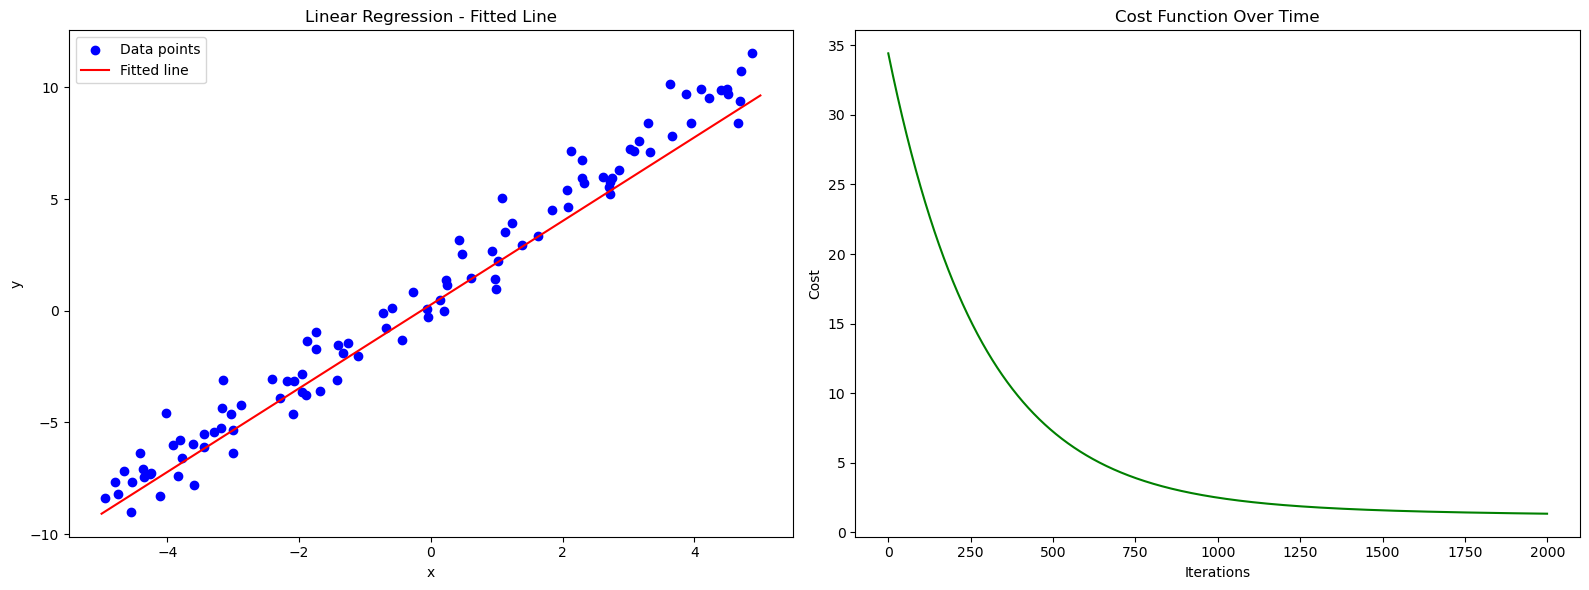

In [22]:
#// BEGIN_TODO [5XSL0_Assignment1_2_1c] Plot results linear regression

# Generate data
X, y = ex121_generate_data()

# Add bias term (intercept)
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add a column of ones to X

# Initial parameters and settings
theta_initial = np.array([0.0, 0.0]).reshape(-1, 1)
learning_rate = 0.0001
iterations = 2000

# Perform gradient descent
theta_optimal, cost_history = gradient_descent(X_b, y, theta_initial, learning_rate, iterations)

# Print optimized parameters
print(f"Optimized parameters (theta): {theta_optimal.ravel()}")

# Create subplots for side-by-side display
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Scatter plot and fitted line
axs[0].scatter(X, y, color='blue', label='Data points')
x_range = np.linspace(-5, 5, 100).reshape(-1, 1)
x_range_b = np.c_[np.ones((x_range.shape[0], 1)), x_range]
y_pred = x_range_b @ theta_optimal
axs[0].plot(x_range, y_pred, color='red', label='Fitted line')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Linear Regression - Fitted Line')
axs[0].legend()

# Plot 2: Cost function over iterations
axs[1].plot(range(iterations), cost_history, color='green')
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('Cost')
axs[1].set_title('Cost Function Over Time')

# Display the plots
plt.tight_layout()
plt.show()


#// END_TODO [5XSL0_Assignment1_2_1c]

### End of exercise 2.1

---
---

In the above exercise the obtained model does not provide a good fit to the data. From observing the data it seems that there is an offset in the data. The actual underlying model of the data does not seem to cross the point (0, 0), but instead the point (0, 0.5). In order to cope with this, we need to add a so-called DC or bias term $b$ to our model. This requires us to write our linear model as 
$$y \approx \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_M x_M + b= \sum_{m=1}^M \theta_m x_m + b.$$
This bias term can be incorporated in our current model by changing our input and parameter vector. If we add to all input data vector an entry of $1$ as $\tilde{{\boldsymbol{x}}} = [x_1, x_2, \ldots, x_M, 1]^\top$ and if we add the bias term $b$ to our parameter vector as $\tilde{\boldsymbol{\theta}} = [\boldsymbol{\theta}^\top, b]^\top$, the linear system can be written as 
$$y \approx \tilde{\boldsymbol{x}}^\top \tilde{\boldsymbol{\theta}} = \begin{bmatrix} {\boldsymbol{x}}^\top & 1 \end{bmatrix}\begin{bmatrix} \boldsymbol{\theta} \\ b\end{bmatrix}.$$
When dealing with multiple data instances (${\boldsymbol{y}} \approx X\boldsymbol{\theta}$) we can include this bias term by again adding this term to the parameter vector and by adding a column of ones to $X$.

---
---
### Exercise 2.2: Univariate linear regression with bias (2 points)
This exercise is similar to exercise 2.1, but now a bias term will have to added in the linear model.

Use the function `X, y = ex121_generate_data()` to generate some univariate data (i.e. 1-dimensional) and model the data ${\boldsymbol{y}}$ by a linear model with bias term. First update the input data matrix to include a bias term and then use gradient descent for optimizing the parameter vector $\tilde{\boldsymbol{\theta}}$, which now also includes the bias term.

Finally, make a scatter plot of the data and draw in the same plot a line representing the predictions $\hat{{\boldsymbol{y}}}$ using the optimized value of $\tilde{\boldsymbol{\theta}}$ for $-5 \leq x \leq 5$. Also create a plot showing the cost function over time.

Use the following initial values: $\tilde{\boldsymbol{\theta}}=[0.0, 0.0]^\top$, $\lambda=0.001$ and 2000 iterations.

In [ ]:
#// BEGIN_TODO [5XSL0_Assignment1_2_2a] Update data and perform gradient descent

# ===== =====> [Remco van Vliet] Replace this line by your code. <===== ===== #

#// END_TODO [5XSL0_Assignment1_2_2a]

In [ ]:
#// BEGIN_TODO [5XSL0_Assignment1_2_2b] Plot results with bias term

# ===== =====> [Remco van Vliet] Replace this line by your code. <===== ===== #

#// END_TODO [5XSL0_Assignment1_2_2b]

### End of exercise 2.2

---
---

In the previous exercise we have seen that changing the input data matrix $X$ allows us to extend our model. Instead of adding a bias term by adding a column of ones, we could also consider manually adding different terms (or features) depending on how our data seems to be distributed. If our data seems to be quadratically distribution, a more appropriate model could be 
$$y \approx \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_M x_M + \theta_{M+1} x_1^2 + \theta_{M+2} x_2^2 + \ldots + \theta_{2M} x_M^2 + b= \sum_{m=1}^M \theta_m x_m + \sum_{m=M+1}^{2M} \theta_m x_m^2 + b.$$
These quadratic terms can be incorporated in our current model by updating our input and parameter vector. We could write this linear system as 
$$y \approx \tilde{\boldsymbol{x}}^\top \tilde{\boldsymbol{\theta}} = \begin{bmatrix} {\boldsymbol{x}}^\top & ({\bf{x}}^{\circ 2})^\top & 1 \end{bmatrix}\begin{bmatrix} \boldsymbol{\theta}_{1:M} \\ \boldsymbol{\theta}_{M+1:2M} \\ b\end{bmatrix}.$$
Here the $\circ 2$ operations denotes the elementwise power. Note that this model is still linear with respect to its parameters even though it contains quadratic terms. This approach where the input is changed can be regarded as a form of feature engineering and is closely related to kernels.

This approach can be extended towards more complicated models. The columns that we are adding in our input data matrix can be considered as hand-crafted features. These features represent our signal in different ways, being just as it is or being quadraticcally multiplied. The hand-crafted aspect states that we have to add these columns ourselves and that we are in control on which features/representations are used in our model.

---
---
### Exercise 2.3: Univariate linear regression with bias and quadratic term (1 point)
Use the function `X, y = ex123_generate_data()` to generate some univariate data (i.e. 1-dimensional) and model the data ${\boldsymbol{y}}$ by a linear model with quadratic and bias terms. First alter the input data matrix to include the quadratic terms and the bias term and then use gradient descent for optimizing the extended parameter vector $\tilde{\boldsymbol{\theta}}$.

Finally, make a scatter plot of the data and draw in the same plot a line representing the predictions $\hat{{\boldsymbol{y}}}$ using the optimized value of $\tilde{\boldsymbol{\theta}}$ for $-5 \leq x \leq 5$. Also create a plot showing the cost function over time.

Use the following initial values: $\tilde{\boldsymbol{\theta}}=[0.0, 0.0, 0.0]^\top$, $\lambda=0.001$ and 2000 iterations.

In [ ]:
#// BEGIN_TODO [5XSL0_Assignment1_2_3a] Add quadratic term and perform gradient descent

# Function to generate data
def ex123_generate_data():
    np.random.seed(42)
    X = np.random.uniform(-5, 5, 50).reshape(-1, 1)
    y = 2.5 * X**2 - 3 * X + 5 + np.random.normal(0, 2, X.shape)
    return X, y

# Gradient descent function
def gradient_descent(X, y, theta, learning_rate, iterations):
    N = len(y)
    cost_history = []

    for _ in range(iterations):
        predictions = X @ theta
        residuals = predictions - y
        gradient = (2 / N) * X.T @ residuals
        theta -= learning_rate * gradient

        # Compute and store the cost
        cost = (1 / N) * np.sum((residuals) ** 2)
        cost_history.append(cost)

    return theta, cost_history


#// END_TODO [5XSL0_Assignment1_2_3a]

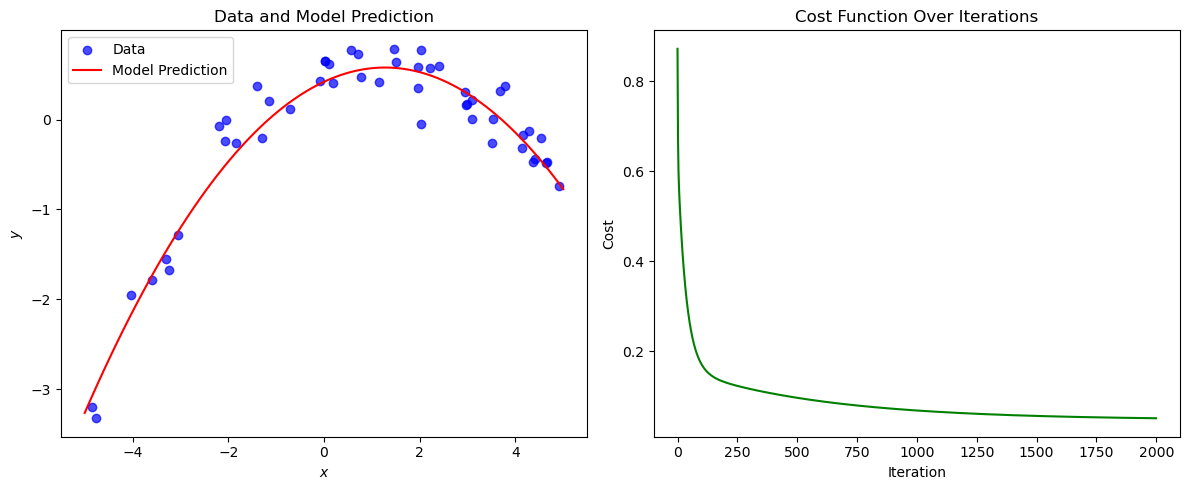

Optimized parameters (theta): [-0.09766051  0.24921165  0.42170531]


In [41]:
#// BEGIN_TODO [5XSL0_Assignment1_2_3b] Plot results with quadratic term

# Generate data
X, y = ex123_generate_data()

# Extend input data to include quadratic and bias terms
X_extended = np.hstack([X**2, X, np.ones((X.shape[0], 1))])

# Initialize parameters
theta = np.zeros(X_extended.shape[1])  # [theta_quadratic, theta_linear, theta_bias]
learning_rate = 0.001
iterations = 2000

# Perform gradient descent
theta_optimized, cost_history = gradient_descent(X_extended, y, theta, learning_rate, iterations)

# Predictions for visualization
x_plot = np.linspace(-5, 5, 100).reshape(-1, 1)
X_plot_extended = np.hstack([x_plot**2, x_plot, np.ones((x_plot.shape[0], 1))])
y_plot = X_plot_extended @ theta_optimized

# Visualization
plt.figure(figsize=(12, 5))

# Scatter plot of data and model predictions
plt.subplot(1, 2, 1)
plt.scatter(X, y, label="Data", color="blue", alpha=0.7)
plt.plot(x_plot, y_plot, label="Model Prediction", color="red")
plt.title("Data and Model Prediction")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()

# Cost function over time
plt.subplot(1, 2, 2)
plt.plot(range(iterations), cost_history, color="green")
plt.title("Cost Function Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.tight_layout()
plt.show()

# Print the optimized parameters
print("Optimized parameters (theta):", theta_optimized)

#// END_TODO [5XSL0_Assignment1_2_3b]

### End of exercise 2.3

---
---

## Part 3: Linear classification problems
In the linear regression problems that we discussed above the goal was to map some input in $\mathbb{R}^M$ to some output in $\mathbb{R}$. Ofcourse this output can also be multidimensional. In linear classification problems the goal is not to map some input to a continuous output, but to map some input into a set of classes. In this assignment we will focus on the case where we have 2 classes. This is also known as a binary or logistic regression problem. For the binary classification task we have some (multidimensional) input data $X$, similarly defined as in the regression problem, and some output ${\boldsymbol{y}}$, where each of the output $y_n \in \{0, 1\}$. The output value is also known as the label and indicates to which group or cluster a certain point belongs.

The linear regression model that we used in Part 2 is not directly suited for these classifications tasks as its output is located in the entire real set. In order to transform this output to an approximation of the set $\{0, 1\}$, we need to transform the original output by some non-linear function. A commonly chosen function is the so-called sigmoid function $\sigma(x)$ which maps the entire real axis to the domain $(0, 1)$. This sigmoid function is defined as 
$$ \sigma(x) = \frac{1}{1+e^{-x}} .$$
By extending our previous model with this sigmoid function, its becomes a logistic regression model and our output is now modeled as 
$$y_n \approx \hat{y}_n = \sigma(z_n) = \sigma({\boldsymbol{x}}_n^\top \boldsymbol{\theta}).$$
Here $z_n={\boldsymbol{x}}_n^\top \boldsymbol{\theta}$ is an intermediate variable obtained at the output of the original linear model that we had for the linear regression problem. 

Through optimization the predicted classes will approximate the true classes as good as possible. The linear model will affinely transform the input data to the real axis with the goal of making the transformed data separable by the sigmoid function. For logistic regression our optimization goal is no longer the mean squared error, but instead we would like to minimize the binary cross-entropy. This cost function is more appropriate as it models the output data as binomial random variables and calculates a probabilistic degree of dissimilarity between the predictions and the true labels. The binary cross-entropy function is defined as 
$$ \mathcal{L}({\boldsymbol{y}}, \hat{{\boldsymbol{y}}}) = -\frac{1}{N} \sum_{n=1}^N \left[y_n \ln (\hat{y}_n)  + (1-y_n) \ln (1-\hat{y}_n) \right].$$
Therefore during optimization the goal is to optimize $\mathcal{L}({\boldsymbol{y}}, \hat{{\boldsymbol{y}}})$ with respect to $\boldsymbol{\theta}$ using 
$$ \nabla_{\boldsymbol{\theta}} \mathcal{L}({\boldsymbol{y}}, \hat{{\boldsymbol{y}}}) .$$

---
---
### Exercise 3.1: Logistic regression preparation (2 points)
The goal of this exercise is to prepare you for training a logistic regression model.

Calculate the entries of the Jacobian matrices $\frac{\partial \mathcal{L}({\bf{y}}, \hat{{\bf{y}}})}{\partial \hat{y}_i}$ and $\frac{\partial \hat{y}_i}{\partial z_j}$ analytically. Write down your derivations and results in a Markdown cell. Furthermore describe how the Jacobian matrix over the sigmoid transformation looks like.

Furthermore, visualize the data using `X, y = ex13_generate_data()`. The $X$ matrix consists out of a set of 2-dimensional data points and ${\bf{y}}$ consists out of the corresponding binary labels. Create a scatter plot of the input data and give the two different classes different colors.  

`#// BEGIN_TODO [5XSL0_Assignment1_3_1a] Derivations logistic regression + question`

<div class='alert alert-warning' role='alert'>[Remco van Vliet] Replace this line by your text.</div>

`#// END_TODO [5XSL0_Assignment1_3_1a]`

In [ ]:
#// BEGIN_TODO [5XSL0_Assignment1_3_1b] Plot clusters of data

# ===== =====> [Remco van Vliet] Replace this line by your code. <===== ===== #

#// END_TODO [5XSL0_Assignment1_3_1b]

### End of exercise 3.1

---
---

Once the model has been trained, there exist points which are equally likely to be in both classes.  For these points the following holds:
$$ \sigma(z_n) = 0.5 .$$
Given the definition of the sigmoid function, we can find that this occurs when $z_n = 0$. As $z_n$ is defined as $z_n = {\boldsymbol{x}}_n^\top \boldsymbol{\theta}$, we can also write this as 
$$ {\boldsymbol{x}}_n^\top \boldsymbol{\theta} = 0.$$ 
If we include a bias term in our model, the individual vectors are given as ${\boldsymbol{x}} = [x_1, x_2, 1]^\top$ and $\boldsymbol{\theta} = [\theta_1, \theta_2, b]^\top$. This can be expanded to yield $x_1\theta_1 + x_2\theta_2 + b = 0$, from which we can find the representation of a line as 
$$ x_2 = -\frac{\theta_1}{\theta_2}x_1 - \frac{b}{\theta_2},$$
with slope $-\frac{\theta_1}{\theta_2}$ and y-axis crossing $-\frac{b}{\theta_2}$. This line specifies the points which are equally likely to be assigned to both classes and is also known as the decision boundary.

---
---
### Exercise 3.2: Logistic regression (4 points)
Use the above determined derivative in order to optimize the parameters $\boldsymbol{\theta}$ with respect to the data set obtained using `X, y = ex13_generate_data()`. Use the linear model with the sigmoid activation function at its output to minimize the binary cross-entropy. The linear model should also include a bias component. To evaluate the performance, calculate how many percent of the total number of data points is assigned correctly.

Create a plot of the cost function as a function of the number of iterations. Furthermore plot the data with the predicted labels and draw the decision boundary. Limit the axis for the data and decision boundary to appropriate values.

Use the following hyperparameters: starting point $\boldsymbol{\theta} = [0, 0, 0]^\top$, learning rate $10^{-2}$ and 5000 iterations. 

In [43]:
#// BEGIN_TODO [5XSL0_Assignment1_3_2a] Logistic regression using gradient descent algorithm

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary cross-entropy loss
def binary_cross_entropy(y, y_pred):
    return -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))

# Gradient descent for logistic regression
def logistic_regression(X, y, theta, learning_rate, iterations):
    N = len(y)
    cost_history = []

    for _ in range(iterations):
        # Compute predictions
        z = X @ theta
        y_pred = sigmoid(z)

        # Compute gradient
        gradient = (1 / N) * X.T @ (y_pred - y)
        theta -= learning_rate * gradient

        # Compute and store cost
        cost = binary_cross_entropy(y, y_pred)
        cost_history.append(cost)

    return theta, cost_history

# Generate dataset
def ex13_generate_data():
    np.random.seed(42)
    class_1 = np.random.multivariate_normal([2, 2], [[1, 0.5], [0.5, 1]], 50)
    class_0 = np.random.multivariate_normal([-2, -2], [[1, 0.5], [0.5, 1]], 50)
    X = np.vstack((class_1, class_0))
    y = np.hstack((np.ones(50), np.zeros(50)))
    return X, y

#// END_TODO [5XSL0_Assignment1_3_2a]

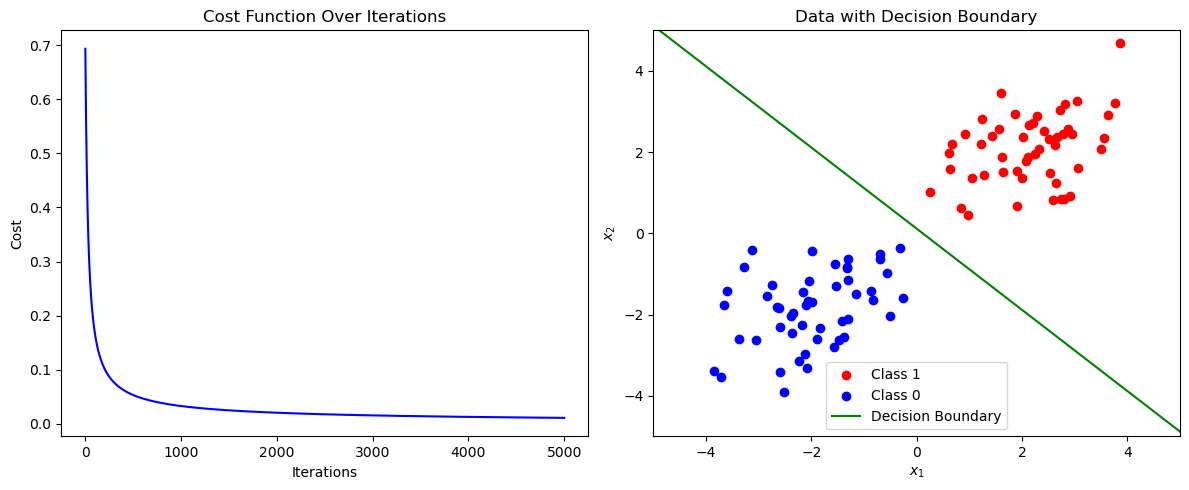

Optimized parameters (theta): [ 1.73982785  1.74028422 -0.20031773]
Accuracy: 100.00%


In [44]:
#// BEGIN_TODO [5XSL0_Assignment1_3_2b] Plot decision boundary and loss function

# Generate data
X, y = ex13_generate_data()

# Add bias term to X
X_bias = np.hstack([X, np.ones((X.shape[0], 1))])

# Initialize parameters
theta = np.zeros(X_bias.shape[1])  # [theta_1, theta_2, b]
learning_rate = 0.01
iterations = 5000

# Perform logistic regression
theta_optimized, cost_history = logistic_regression(X_bias, y, theta, learning_rate, iterations)

# Evaluate performance
z = X_bias @ theta_optimized
y_pred = (sigmoid(z) >= 0.5).astype(int)
accuracy = np.mean(y_pred == y) * 100

# Decision boundary
x1_vals = np.linspace(-5, 5, 100)
x2_vals = -(theta_optimized[0] / theta_optimized[1]) * x1_vals - (theta_optimized[2] / theta_optimized[1])

# Visualization
plt.figure(figsize=(12, 5))

# Cost function over iterations
plt.subplot(1, 2, 1)
plt.plot(range(iterations), cost_history, color="blue")
plt.title("Cost Function Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")

# Data with decision boundary
plt.subplot(1, 2, 2)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="red", label="Class 1")
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="blue", label="Class 0")
plt.plot(x1_vals, x2_vals, color="green", label="Decision Boundary")
plt.title("Data with Decision Boundary")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend()

plt.tight_layout()
plt.show()

# Print results
print("Optimized parameters (theta):", theta_optimized)
print(f"Accuracy: {accuracy:.2f}%")

#// END_TODO [5XSL0_Assignment1_3_2b]

### End of exercise 3.2

---
---

>   Make sure to restart this notebook and to rerun all cells before submission to check whether all code runs properly.